In [11]:
import h5py
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
def _zero_out_utrs(y):
    # copied from HelixerSequence due to an import error
    y[..., 0] = np.logical_or(y[..., 0], y[..., 1])
    y[..., 1] = 0

In [65]:
def cross_entropy(y_true, y_pred):
    true_class_preds = y_pred[y_true.astype(np.bool)].reshape(-1, 20000)
    losses = -np.log(true_class_preds)
    return losses

In [8]:
p = h5py.File('/home/felix/Desktop/x9HyB_Crubella_predictions.h5', 'r')
d = h5py.File('/home/felix/git/HelixerPrep/data/plants/single_genomes/Crubella/test_data.h5', 'r')

In [84]:
y_true = d['data/y'][:]
y_pred = p['predictions'][:]
sw = d['data/sample_weights'][:]
print(y_true.shape, y_pred.shape, sw.shape)

_zero_out_utrs(y_true)
y_true, y_pred = np.delete(y_true, 1, axis=-1), np.delete(y_pred, 1, axis=-1)

(12424, 20000, 4) (12424, 20000, 4) (12424, 20000)


In [86]:
losses = [np.mean(cross_entropy(y_true[i, sw[i]], y_pred[i, sw[i]]), axis=1) for i in range(y_true.shape[0])]
loss_idx = np.argsort(losses)

ValueError: Must pass 2-d input. shape=(3, 20000, 1)

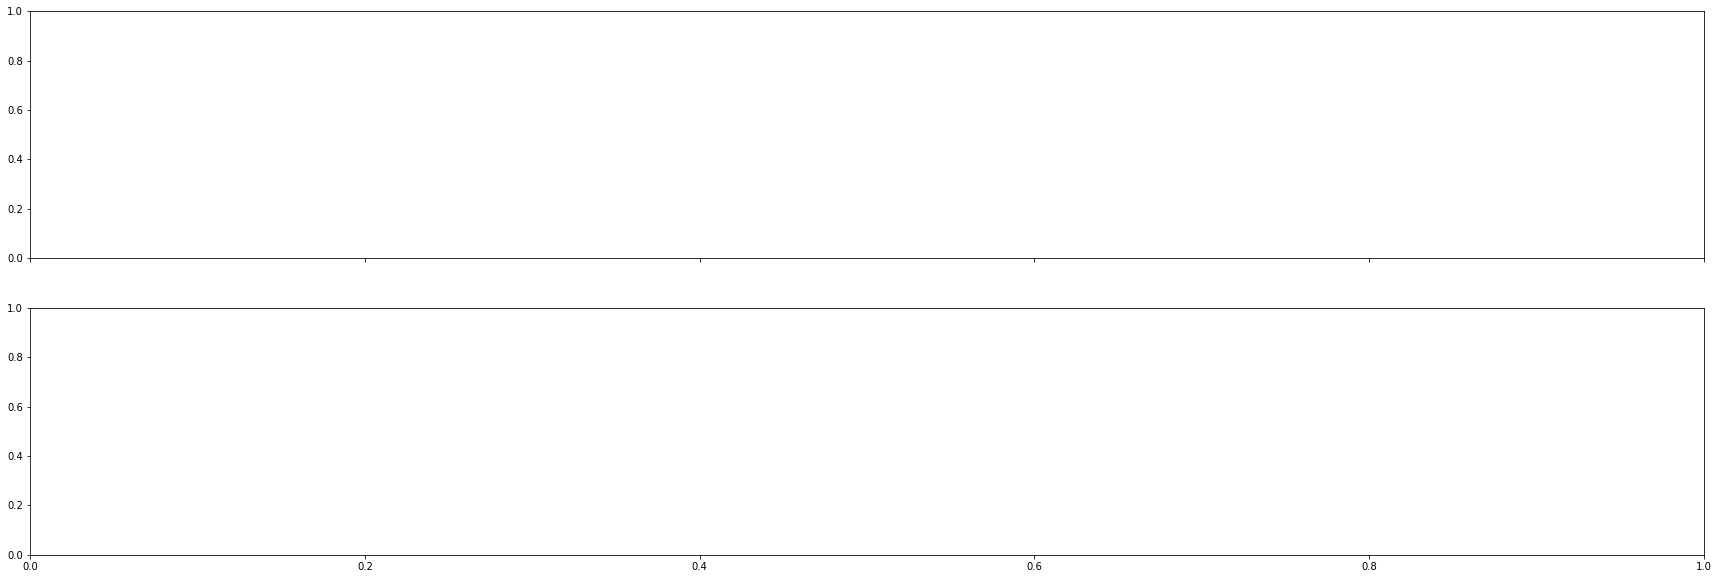

In [87]:
idx = loss_idx[-(np.random.randint(20) + 1)]  # choose sample from the 20 with the highest loss
fig, axes = plt.subplots(2, figsize=(30, 10), sharex=True)
for i, y in enumerate([y_true, y_pred]):
    sns.heatmap(y[idx].T, cbar=False, cmap='Blues', ax=axes[i])